In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [53]:
#import dataset
heart_df = pd.read_csv('heart.csv')       
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [54]:
heart_df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [55]:
#description about dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [56]:
heart_df.shape

(303, 14)

In [57]:
heart_df.isnull().sum()  #Checking null values.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [58]:
#checking the variance
heart_df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

In [59]:
heart_df['trestbps']=np.log(heart_df['trestbps'])   #NORMALIZATION
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])

trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

In [60]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [61]:
x=heart_df.drop('target',axis=1)    
y=heart_df['target']

In [62]:
x=np.array(x).reshape(-1,13)
y=np.array(y).reshape(-1,1)

In [63]:
y.shape

(303, 1)

In [64]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)

In [65]:
from sklearn import metrics
import pickle
from sklearn.metrics import accuracy_score


Accuracy score of the model is: 73.62637362637363 %


<ipython-input-65-221f42c33915>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


In [66]:
age= int(input("Enter the age: "))
sex = int(input("Enter the sex ")) #sex - (1 = male; 0 = female)
cp=int(input("Enter the chest pain type"))
restbps = float(input("Enter the resting blood pressure: "))
chol = float(input("Enter the Cholestrol in mg/dl: "))
fbs = int(input("Enter the fasting blood pressure: ")) #fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
estecg = int(input("Enter the resting  electrocardiographic results: "))
thalach=int(input("Enter the Max Heart Rate achieved: "))
exang=int(input("Enter the exercise induced agina ")) #exercise induced angina (1 = yes; 0 = no)
oldpeak=float(input("Enter the depression induced"))
slope=int(input("Enter slope of peak seg"))
ca=int(input("Enter no of major vessels"))#(0-3)
thal=int(input("Enter the thal")) #3 = normal; 6 = fixed defect; 7 = reversable defect
X_test1=np.array([age,sex,cp,restbps,chol,fbs,estecg,thalach,exang,oldpeak,slope,ca,thal]).reshape(1,-1)

Enter the age: 41
Enter the sex 1
Enter the chest pain type0
Enter the resting blood pressure: 110
Enter the Cholestrol in mg/dl: 172
Enter the fasting blood pressure: 0
Enter the resting  electrocardiographic results: 0
Enter the Max Heart Rate achieved: 158
Enter the exercise induced agina 0
Enter the depression induced0
Enter slope of peak seg2
Enter no of major vessels0
Enter the thal3


G:\ANACONDA\envs\Project1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\envs\Project1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\envs\Project1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

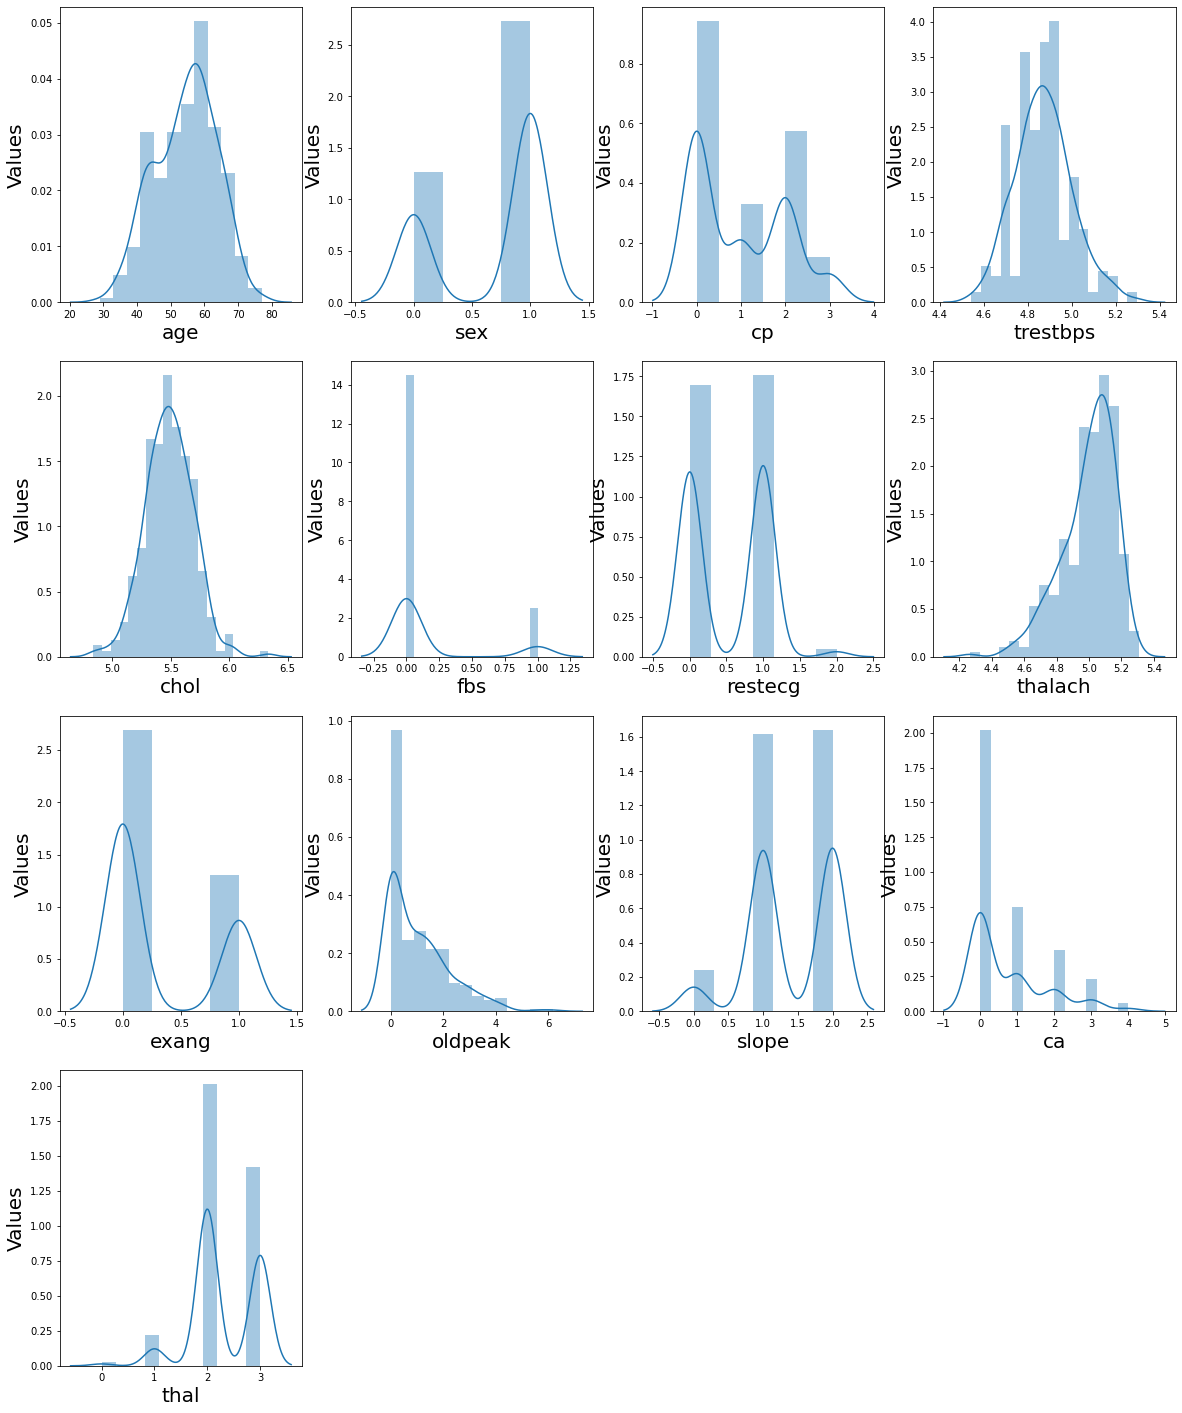

In [30]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(heart_df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

In [69]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
#accuracies['DecisionTreeClassifier']=acc3*100

accuracy_score(y_train,dtc.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Accuracy score of the model is: 79.12087912087912 %


In [70]:
predict=dtc.predict(X_test1)
print ("class of unknown is :",predict[0])

class of unknown is : 0


In [71]:
import pickle
with open('model_decision','wb') as f:
    pickle.dump(dtc,f)

In [72]:
with open('model_decision','rb') as f:
    dec=pickle.load(f)

In [74]:
prediction=dec.predict(X_test1)
print ("class of unknown is :",prediction[0])

class of unknown is : 0


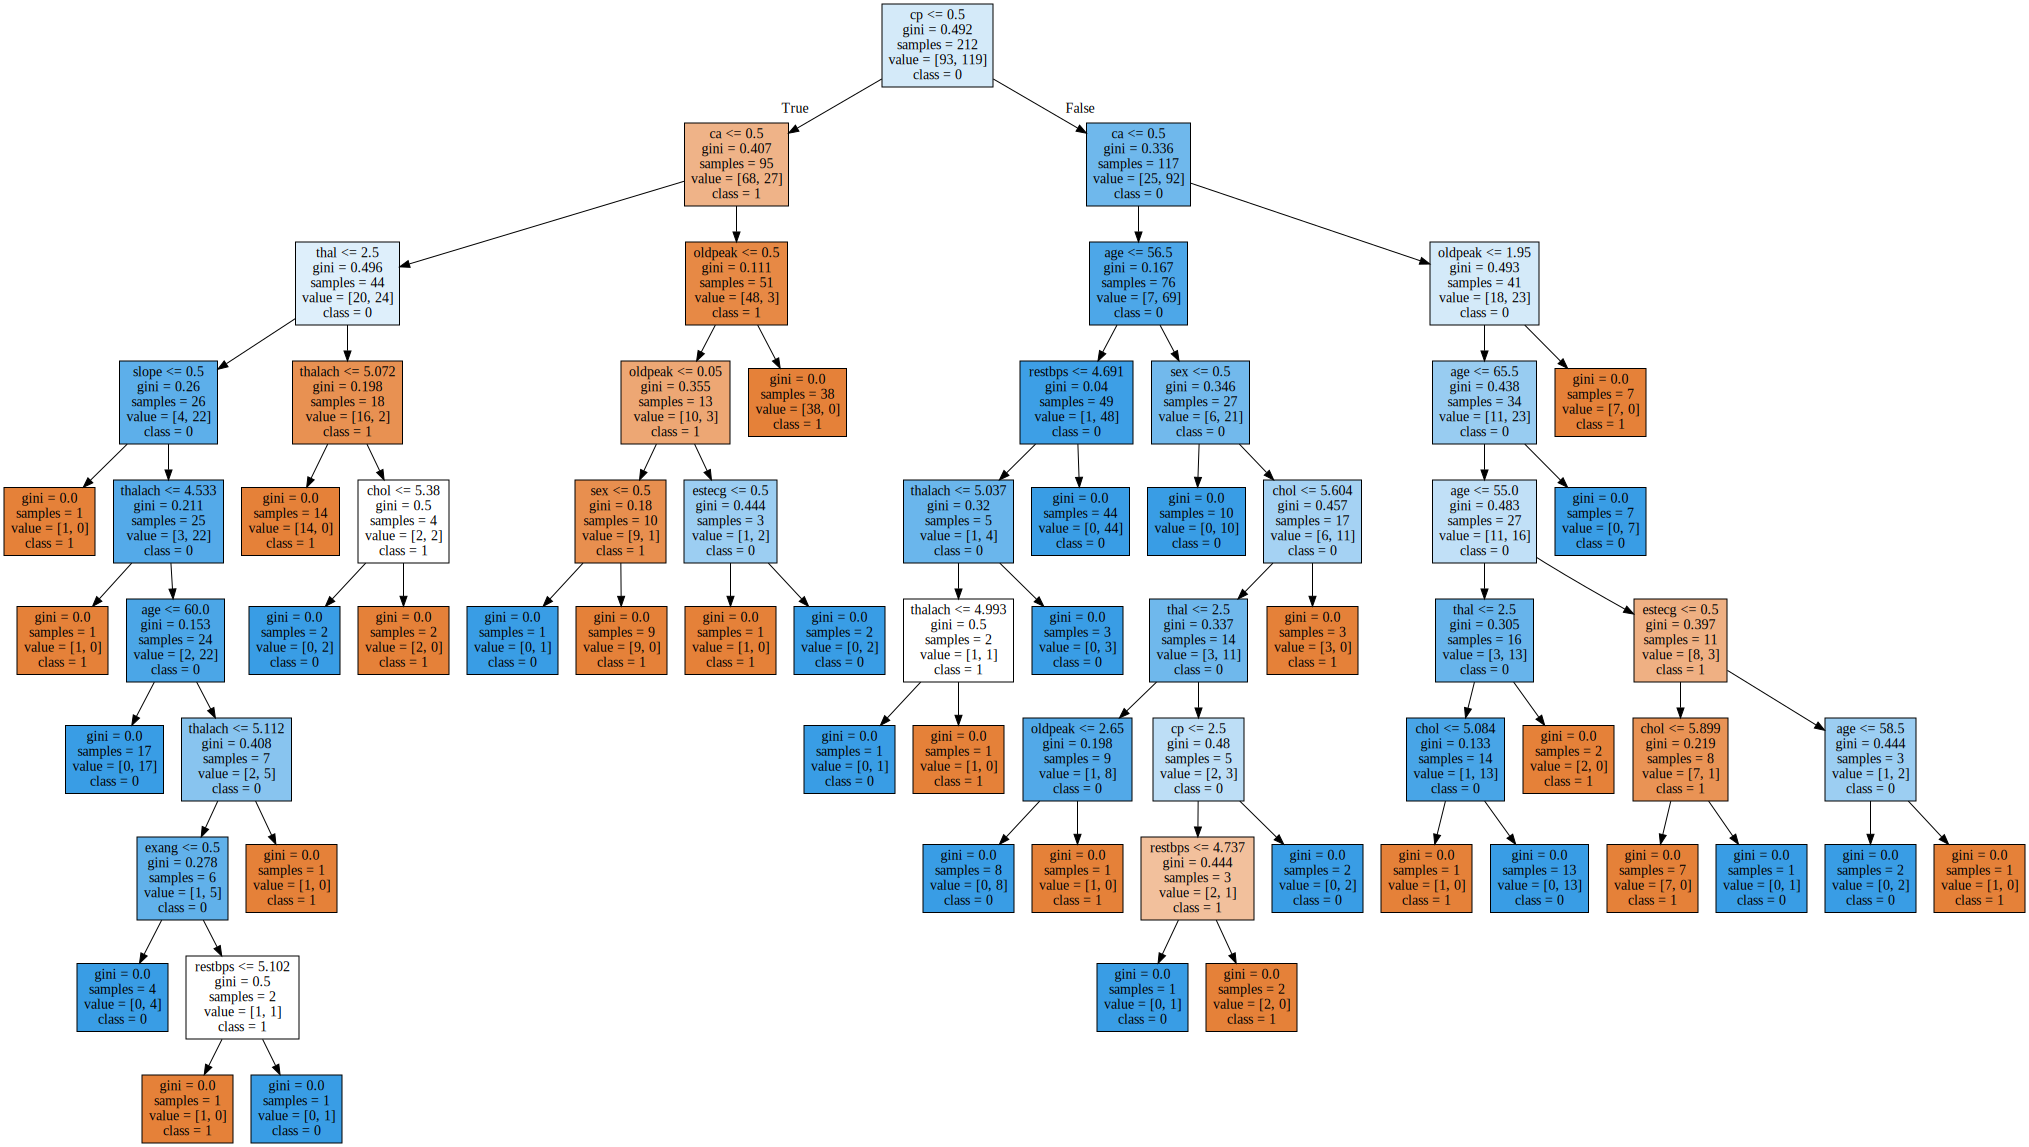

In [78]:
from sklearn import tree
import numpy as np 
import graphviz 
# DOT data 
dot_data = tree.export_graphviz(dtc, out_file=None,feature_names=['age','sex','cp','restbps','chol','fbs','estecg','thalach','exang','oldpeak','slope','ca','thal'], class_names=['1','0'],filled=True)
# Draw graph 
graph = graphviz.Source(dot_data, format="png")
graph